In [2]:
#Importing libraries

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [3]:
df= pd.read_csv(r'C:\Users\shahr\OneDrive\Desktop\Crimes_-_2001_to_Present.csv')

In [ ]:
pd.set_option('display.max.columns',None)

### Data preprocessing

In [3]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
df.shape

(7784664, 22)

In [5]:
df.isnull().sum().sum()

1672996

In [4]:
df= df.dropna()

In [5]:
#Removing unnecessary columns
unused=['IUCR','ID','Case Number','Beat','Ward','Community Area',
       'FBI Code','X Coordinate', 'Y Coordinate',
       'Location']
df=df.drop(unused, axis=1)

In [10]:
df.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude
0,09/05/2015 01:30:00 PM,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000
1,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,15.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400
3,09/05/2015 12:45:00 PM,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,14.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650
4,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,15.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121
5,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,6.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431


In [15]:
df['date2']= pd.to_datetime(df['Date'])

In [16]:
df.dtypes

Date                            object
Block                           object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
District                       float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
date2                   datetime64[ns]
dtype: object

In [17]:
df1=df[0:5]

In [18]:
df1['date2']= pd.to_datetime(df1['Date'])

In [19]:
df=df.drop_duplicates()

In [20]:
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
#df = df.drop(['Updated On'], axis=1)
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,Latitude,Longitude,date2,Month,Day,Hour
0,09/05/2015 01:30:00 PM,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,9.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,2015-09-05 13:30:00,9,5,13
1,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,15.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,2015-09-04 11:30:00,9,4,11
3,09/05/2015 12:45:00 PM,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,14.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,2015-09-05 12:45:00,9,5,12
4,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,15.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,2015-09-05 13:00:00,9,5,13
5,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,6.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,2015-09-05 10:55:00,9,5,10


### Number of crimes per year

In [21]:
total_crimes_per_year = df.groupby('Year')['Primary Type'].count()
total_crimes_per_year = total_crimes_per_year.to_frame()
total_crimes_per_year.rename(columns = {"Primary Type": "Total Crimes"}, inplace = True) 
total_crimes_per_year.reset_index(inplace = True)
n = total_crimes_per_year['Total Crimes'].idxmax()
year = total_crimes_per_year.iloc[n][0]
number_of_crimes = total_crimes_per_year.iloc[n][1]
print(year)
print(number_of_crimes)

2003
470455


In [22]:
total_crimes_per_year

,Year,Total Crimes
0,2001,3875
1,2002,344222
2,2003,470455
3,2004,465780
4,2005,448643
5,2006,444015
6,2007,434546
7,2008,419199
8,2009,385429
9,2010,369237


### Visualizing number of crimes in each year

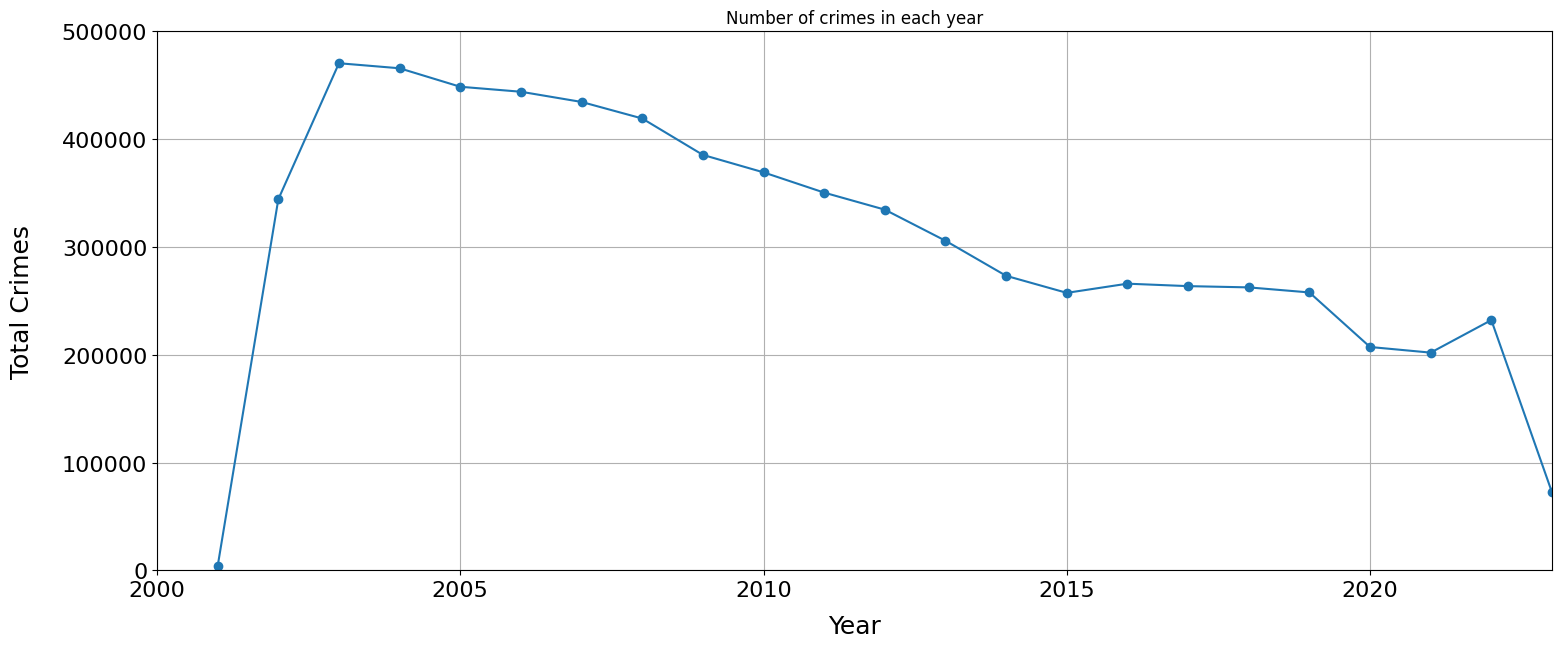

In [23]:

year = total_crimes_per_year['Year']
total_crimes = total_crimes_per_year['Total Crimes']
plt.figure(figsize=(18,7))
plt.plot(year, total_crimes, marker = 'o', label = 'Total Crimes')
plt.title("Number of crimes in each year")
plt.xlabel("Year",fontsize=18,labelpad=10)
plt.ylabel("Total Crimes",fontsize=18,labelpad=20)
plt.axis([2000, 2023, 0, 500000])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.annotate('At this point crimes were at peak',
#xy=(2012, 82602), xytext=(2013, 87000), arrowprops=dict(facecolor='black',
#shrink=0.05))
plt.grid()
plt.show()

### Visualizing number of arrests per year

In [24]:
arrests=df[df['Arrest']==True]
total_arrest_in_every_year = arrests.groupby('Year')['Arrest'].count()
total_arrest_in_every_year=total_arrest_in_every_year.to_frame()
total_arrest_in_every_year.reset_index(inplace = True)
total_arrest_in_every_year

,Year,Arrest
0,2001,716
1,2002,95600
2,2003,139217
3,2004,143188
4,2005,139280
5,2006,133572
6,2007,131057
7,2008,107898
8,2009,108656
9,2010,100252


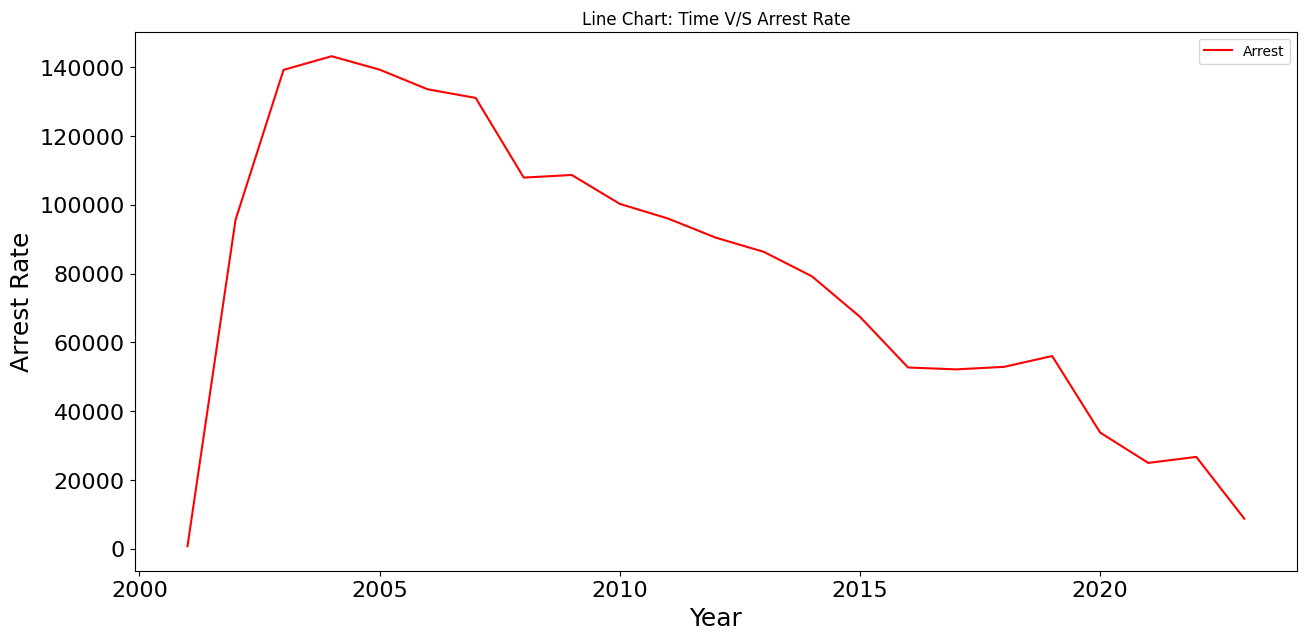

In [25]:
total_arrest_in_every_year.plot(kind = 'line', x = 'Year', y = 'Arrest', figsize=(15,7), color = 'r')
plt.title("Line Chart: Time V/S Arrest Rate")
plt.xlabel("Year",fontsize=18)
plt.ylabel("Arrest Rate",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

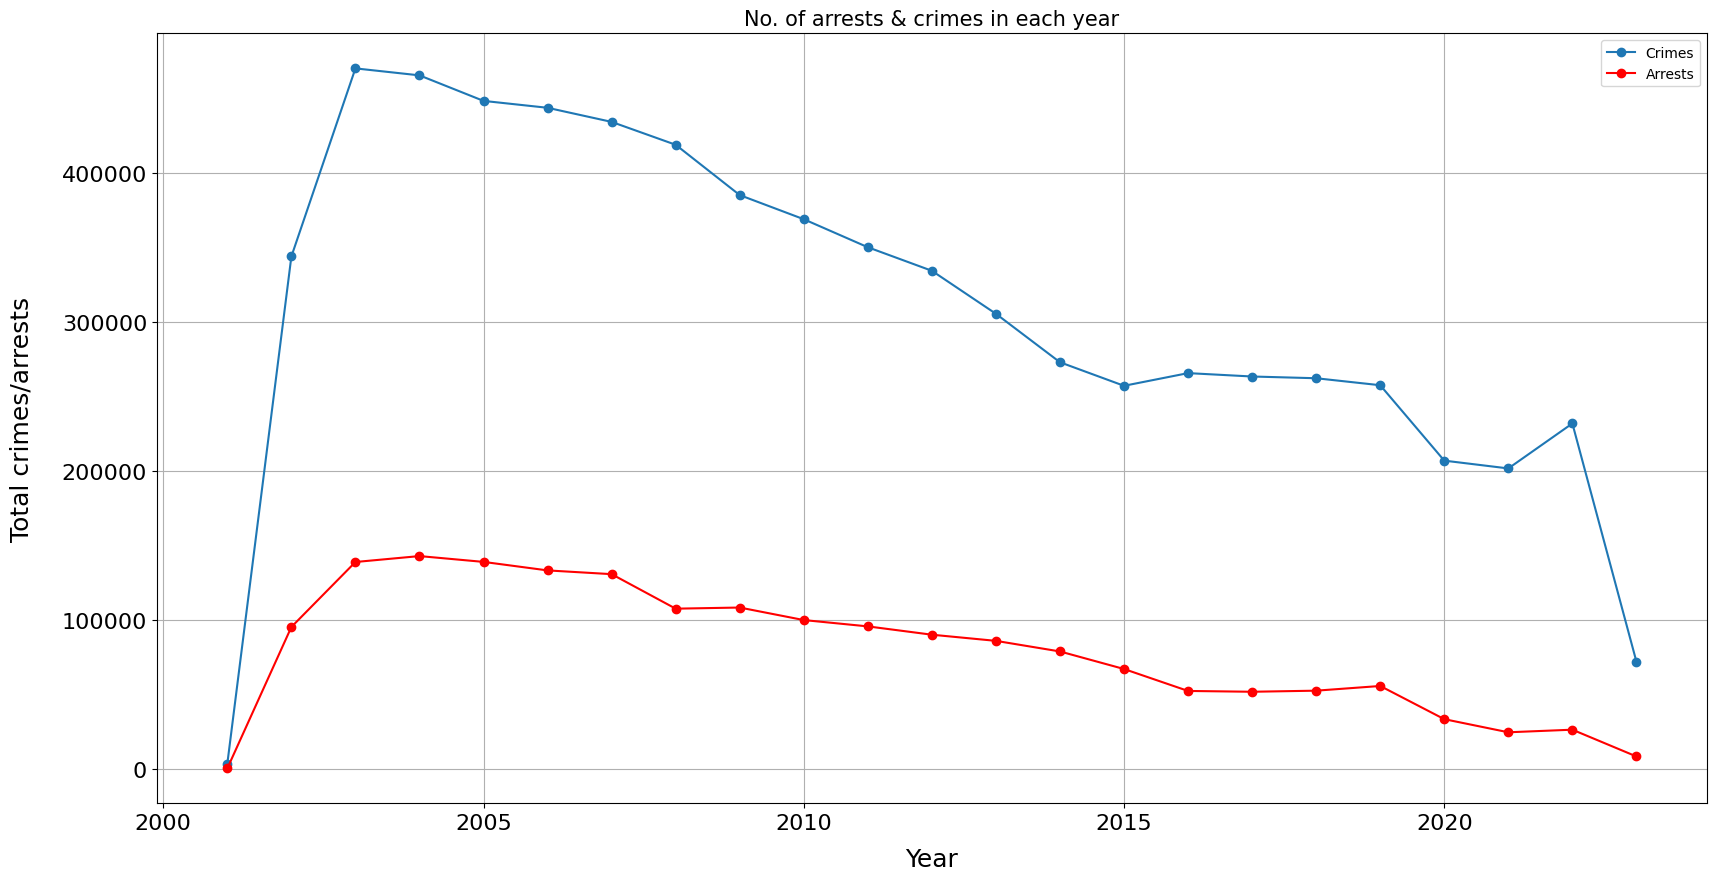

In [26]:
date = total_arrest_in_every_year['Year']
arrests = total_arrest_in_every_year['Arrest']
crimes = total_crimes_per_year['Total Crimes']
plt.figure(figsize=(20,10))
plt.plot(date, crimes, marker = 'o', label = 'Crimes')
plt.plot(date, arrests, marker = 'o', color = 'r', label = 'Arrests')
labels = ['Crimes', 'Arrests']
plt.title("No. of arrests & crimes in each year",fontsize=15)
plt.xlabel("Year",fontsize=18,labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Total crimes/arrests",fontsize=18,labelpad=20)
plt.grid()
plt.legend(labels)


### Bar plot visualizing number of crimes per primary type

<Axes: title={'center': 'Amount of Crimes by Primary Type'}, ylabel='Primary Type'>

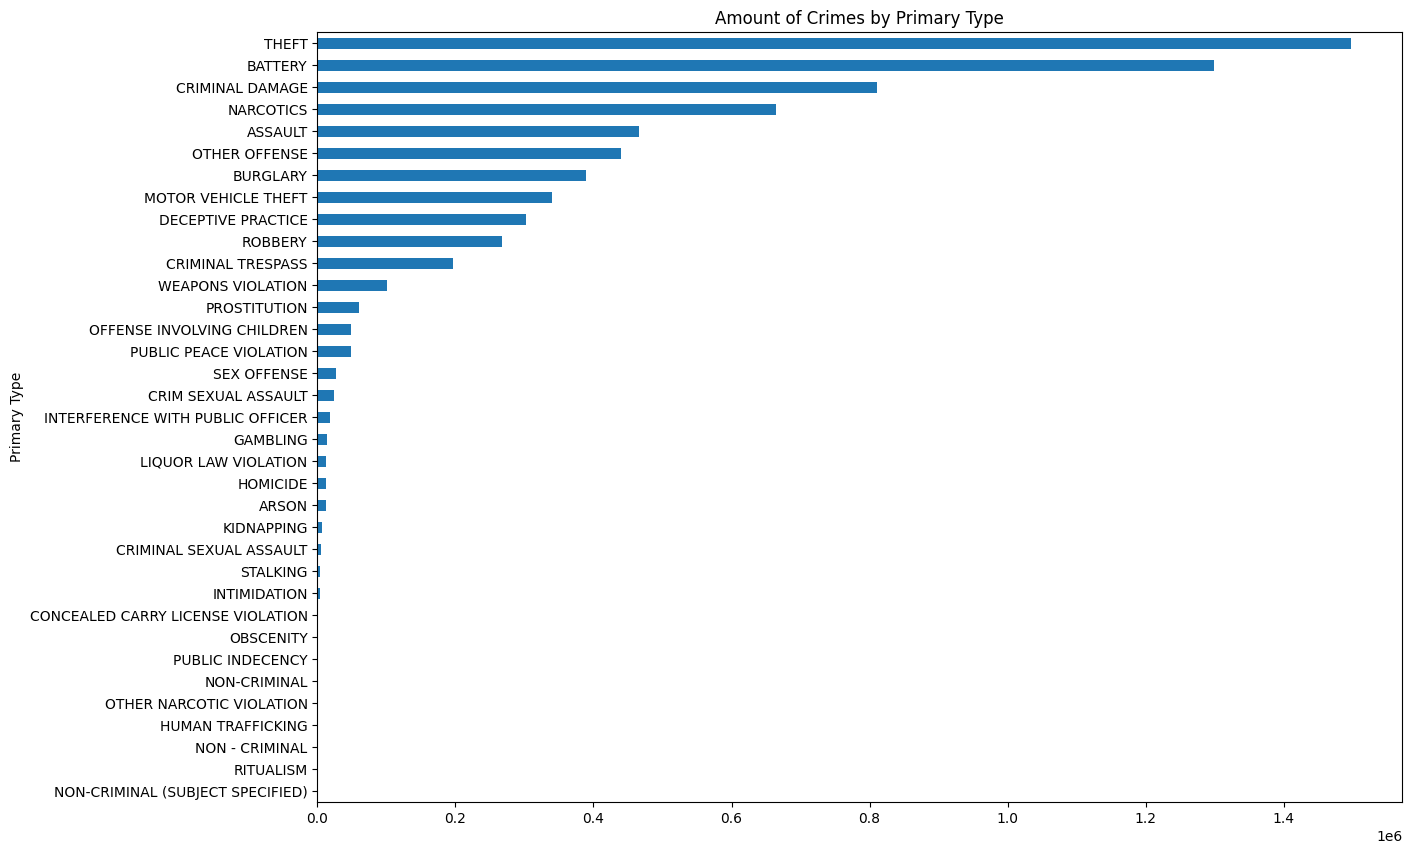

In [27]:
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')


In [28]:
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=False)
unwanted_classes = all_classes.tail(18)
unwanted_classes

,Primary Type,Amt
13,INTERFERENCE WITH PUBLIC OFFICER,17797
10,GAMBLING,13396
16,LIQUOR LAW VIOLATION,12771
11,HOMICIDE,12012
0,ARSON,11859
15,KIDNAPPING,6005
7,CRIMINAL SEXUAL ASSAULT,5876
32,STALKING,4430
14,INTIMIDATION,4269
4,CONCEALED CARRY LICENSE VIOLATION,1069


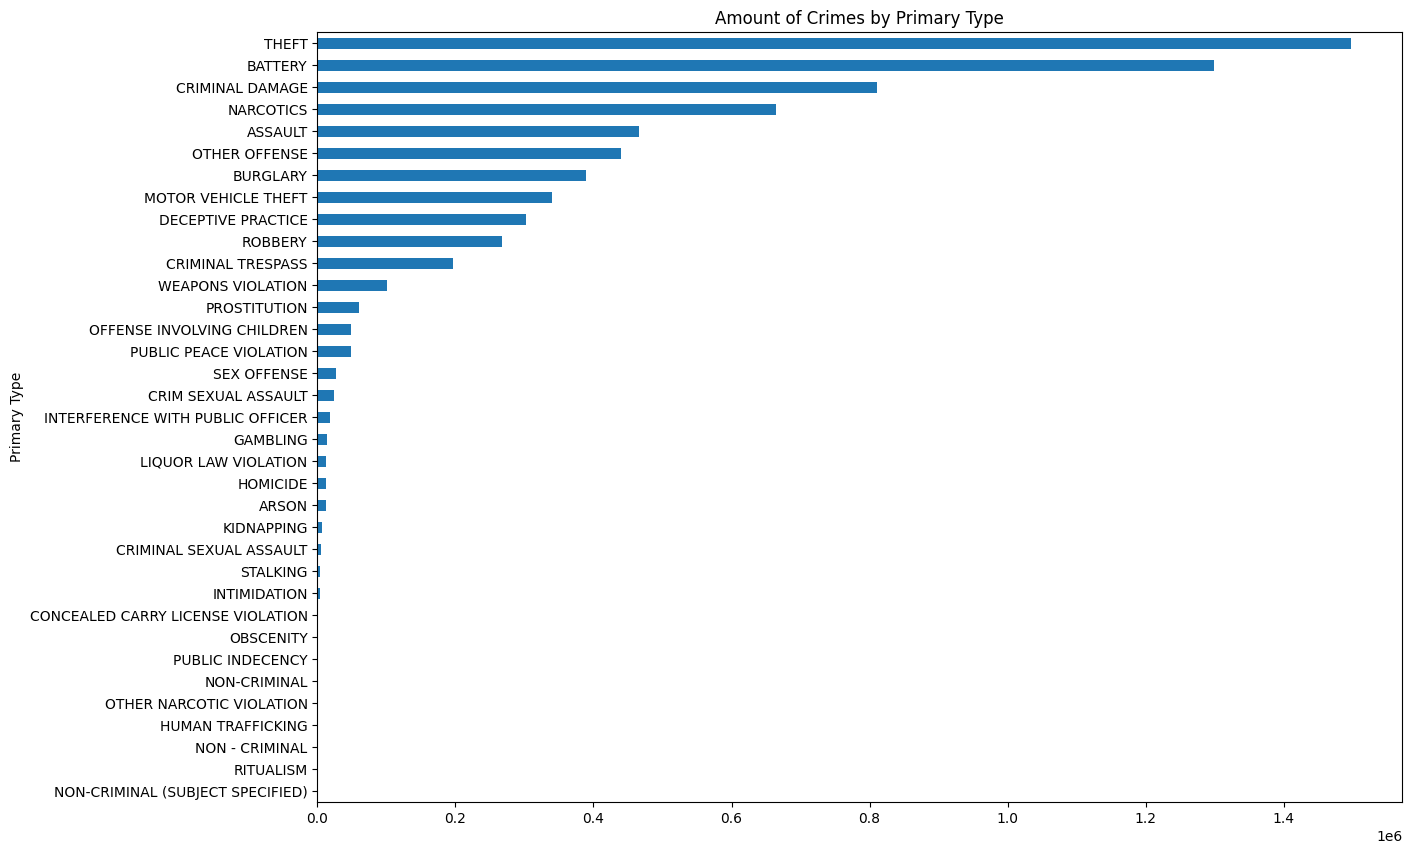

In [29]:
df[df['Primary Type'].isin(unwanted_classes['Primary Type'])]['Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [30]:
df['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'ARSON', 'STALKING', 'KIDNAPPING',
       'INTIMIDATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'OBSCENITY',
       'CRIMINAL SEXUAL ASSAULT', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM'], dtype=object)

### Finding number of crimes occured in CTA (Chicago transit authority)

In [31]:
cta=df[df['Location Description'].str.contains('CTA')]
cta_crimes=cta.groupby('Year')['Block'].count().to_frame()
cta_crimes.reset_index(inplace = True)
cta_crimes

,Year,Block
0,2001,2
1,2002,3678
2,2003,4814
3,2004,5119
4,2005,5371
5,2006,5641
6,2007,5935
7,2008,5806
8,2009,5780
9,2010,6149


In [32]:
arrests=df[df['Arrest']==True]
total_arrest_in_every_year = arrests.groupby('Year')['Arrest'].count()
total_arrest_in_every_year=total_arrest_in_every_year.to_frame()
total_arrest_in_every_year.reset_index(inplace = True)
total_arrest_in_every_year

,Year,Arrest
0,2001,716
1,2002,95600
2,2003,139217
3,2004,143188
4,2005,139280
5,2006,133572
6,2007,131057
7,2008,107898
8,2009,108656
9,2010,100252


### Visualizing CTA Crimes

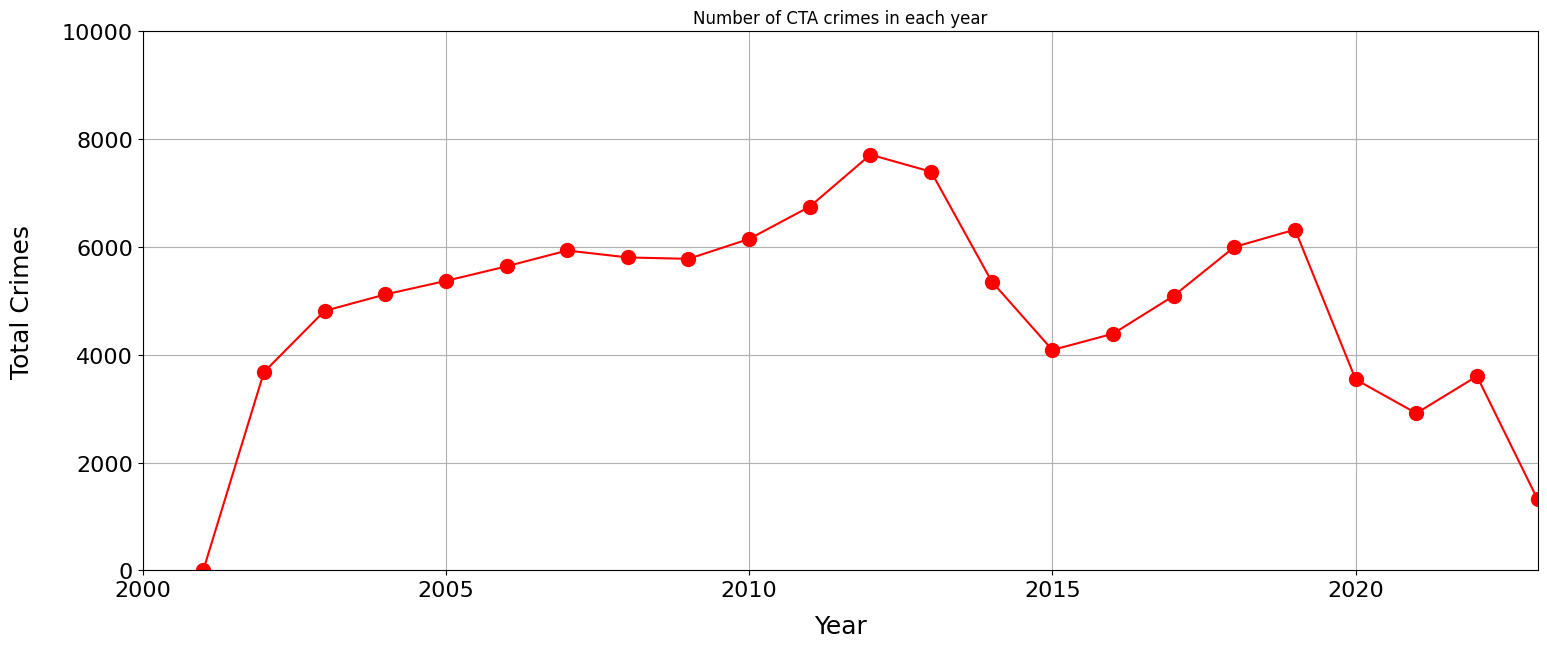

In [33]:

Year = cta_crimes['Year']
Block = cta_crimes['Block']
plt.figure(figsize=(18,7))
plt.plot(Year, Block, marker = 'o', label = 'Total Crimes',markersize=10,color='r')
plt.title("Number of CTA crimes in each year")
plt.xlabel("Year",fontsize=18,labelpad=10)
plt.ylabel("Total Crimes",fontsize=18,labelpad=20)
plt.axis([2000, 2023, 0, 10000])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.annotate('At this point crimes were at peak',
#xy=(2012, 82602), xytext=(2013, 87000), arrowprops=dict(facecolor='black',
#shrink=0.05))
plt.grid()
plt.show()

### Ratio of total arrested criminals vs. not arrested

([<matplotlib.patches.Wedge at 0x27307fa2dd0>,
 [Text(0.7558705357259842, 0.7991618942500411, 'Arrested'),
  Text(-0.7558706105489175, -0.7991618234803305, 'Not Arrested')],
 [Text(0.4122930194869004, 0.43590648777274965, '25.9%'),
  Text(-0.4122930602994095, -0.4359064491710893, '74.1%')])

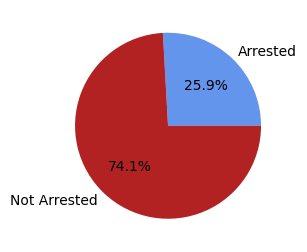

In [11]:
arrest_percent= (len(df[df['Arrest']==True])/len(df)*100)
not_arrest=100-arrest_percent
label='Arrested','Not Arrested'
x=(arrest_percent,not_arrest)
fig = plt.figure(figsize =(3, 4))
plt.pie(x, labels = label,autopct='%1.1f%%',colors=['cornflowerblue','firebrick'])

### Finding distribution of total crimes vs. each hour in a day

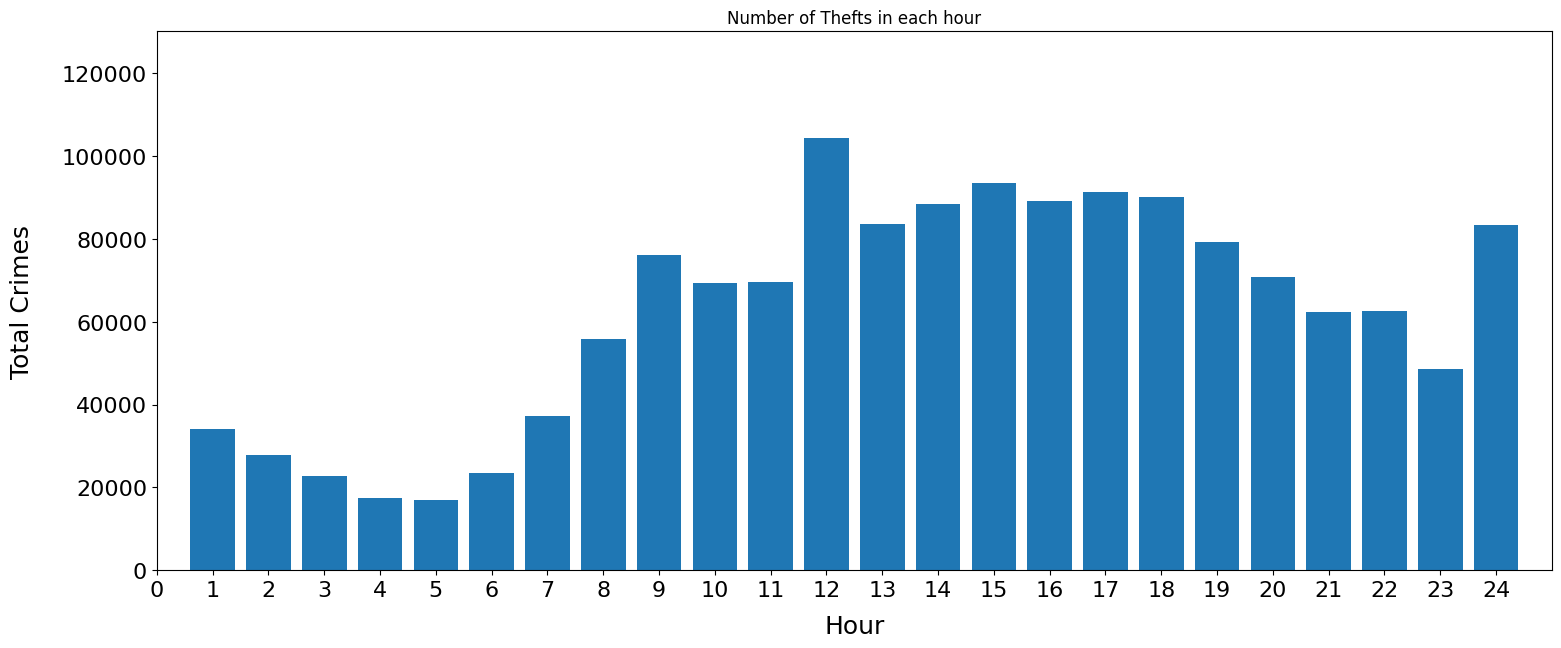

In [35]:
theft_hour=df[df['Primary Type']=='THEFT'].groupby('Hour')['Block'].count().to_frame().reset_index()
theft_hour.rename(columns = {"Block": "Total number"}, inplace = True) 
theft_hour.loc[theft_hour['Hour']==0,['Hour']]=24
hour = theft_hour['Hour']
total_crimes = theft_hour['Total number']
plt.figure(figsize=(18,7))
plt.bar(hour, total_crimes, label = 'Total Crimes')
plt.title("Number of Thefts in each hour")
plt.xlabel("Hour",fontsize=18,labelpad=10)
plt.ylabel("Total Crimes",fontsize=18,labelpad=20)
plt.axis([1, 25, 0, 130000])
plt.xticks(np.arange(0,25,1),fontsize=16)
plt.yticks(fontsize=16)
#plt.annotate('At this point crimes were at peak',
#xy=(2012, 82602), xytext=(2013, 87000), arrowprops=dict(facecolor='black',
#shrink=0.05))
#plt.grid()
plt.show()

### Finding districts with highest crimes

<Axes: ylabel='District'>

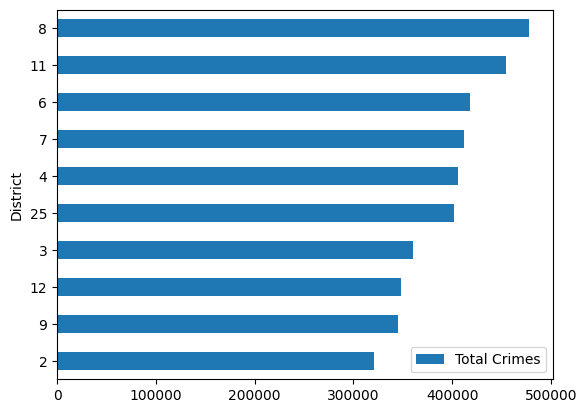

In [36]:
df['District']=df['District'].astype(int)
z=df.groupby([df['District']])['Block'].size().sort_values(ascending=True).to_frame().tail(10)
z.rename(columns = {"Block": "Total Crimes"}, inplace = True)
z.plot(kind='barh')